# Best Pittsburgh Neighboorhood to Live in
By David, Richard, and Ryan

What determines the best neighborhood to live in? The wellbeing and safety of the people living in an area says a lot about how nice it is to live there. The wellbeing of a person can be determined by a large variety of factors, but most notably are the crime rates, fire incidents, and pollutants (like illegal dumps). So we decided to look into those.

### Datasets

* [Pittsburgh Police Arrest Data](https://data.wprdc.org/dataset/arrest-data)
* [Allegheny County Illegal Dump Sites](https://data.wprdc.org/dataset/allegheny-county-illegal-dump-sites)
* [Fire Incidents in City of Pittsburgh](https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh)

### Let's see what's in the arrest data

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

arrests = pd.read_csv("arrests.csv")
arrests.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


How many total arrests are there per neighborhood? What area has the most arrests? and the least?

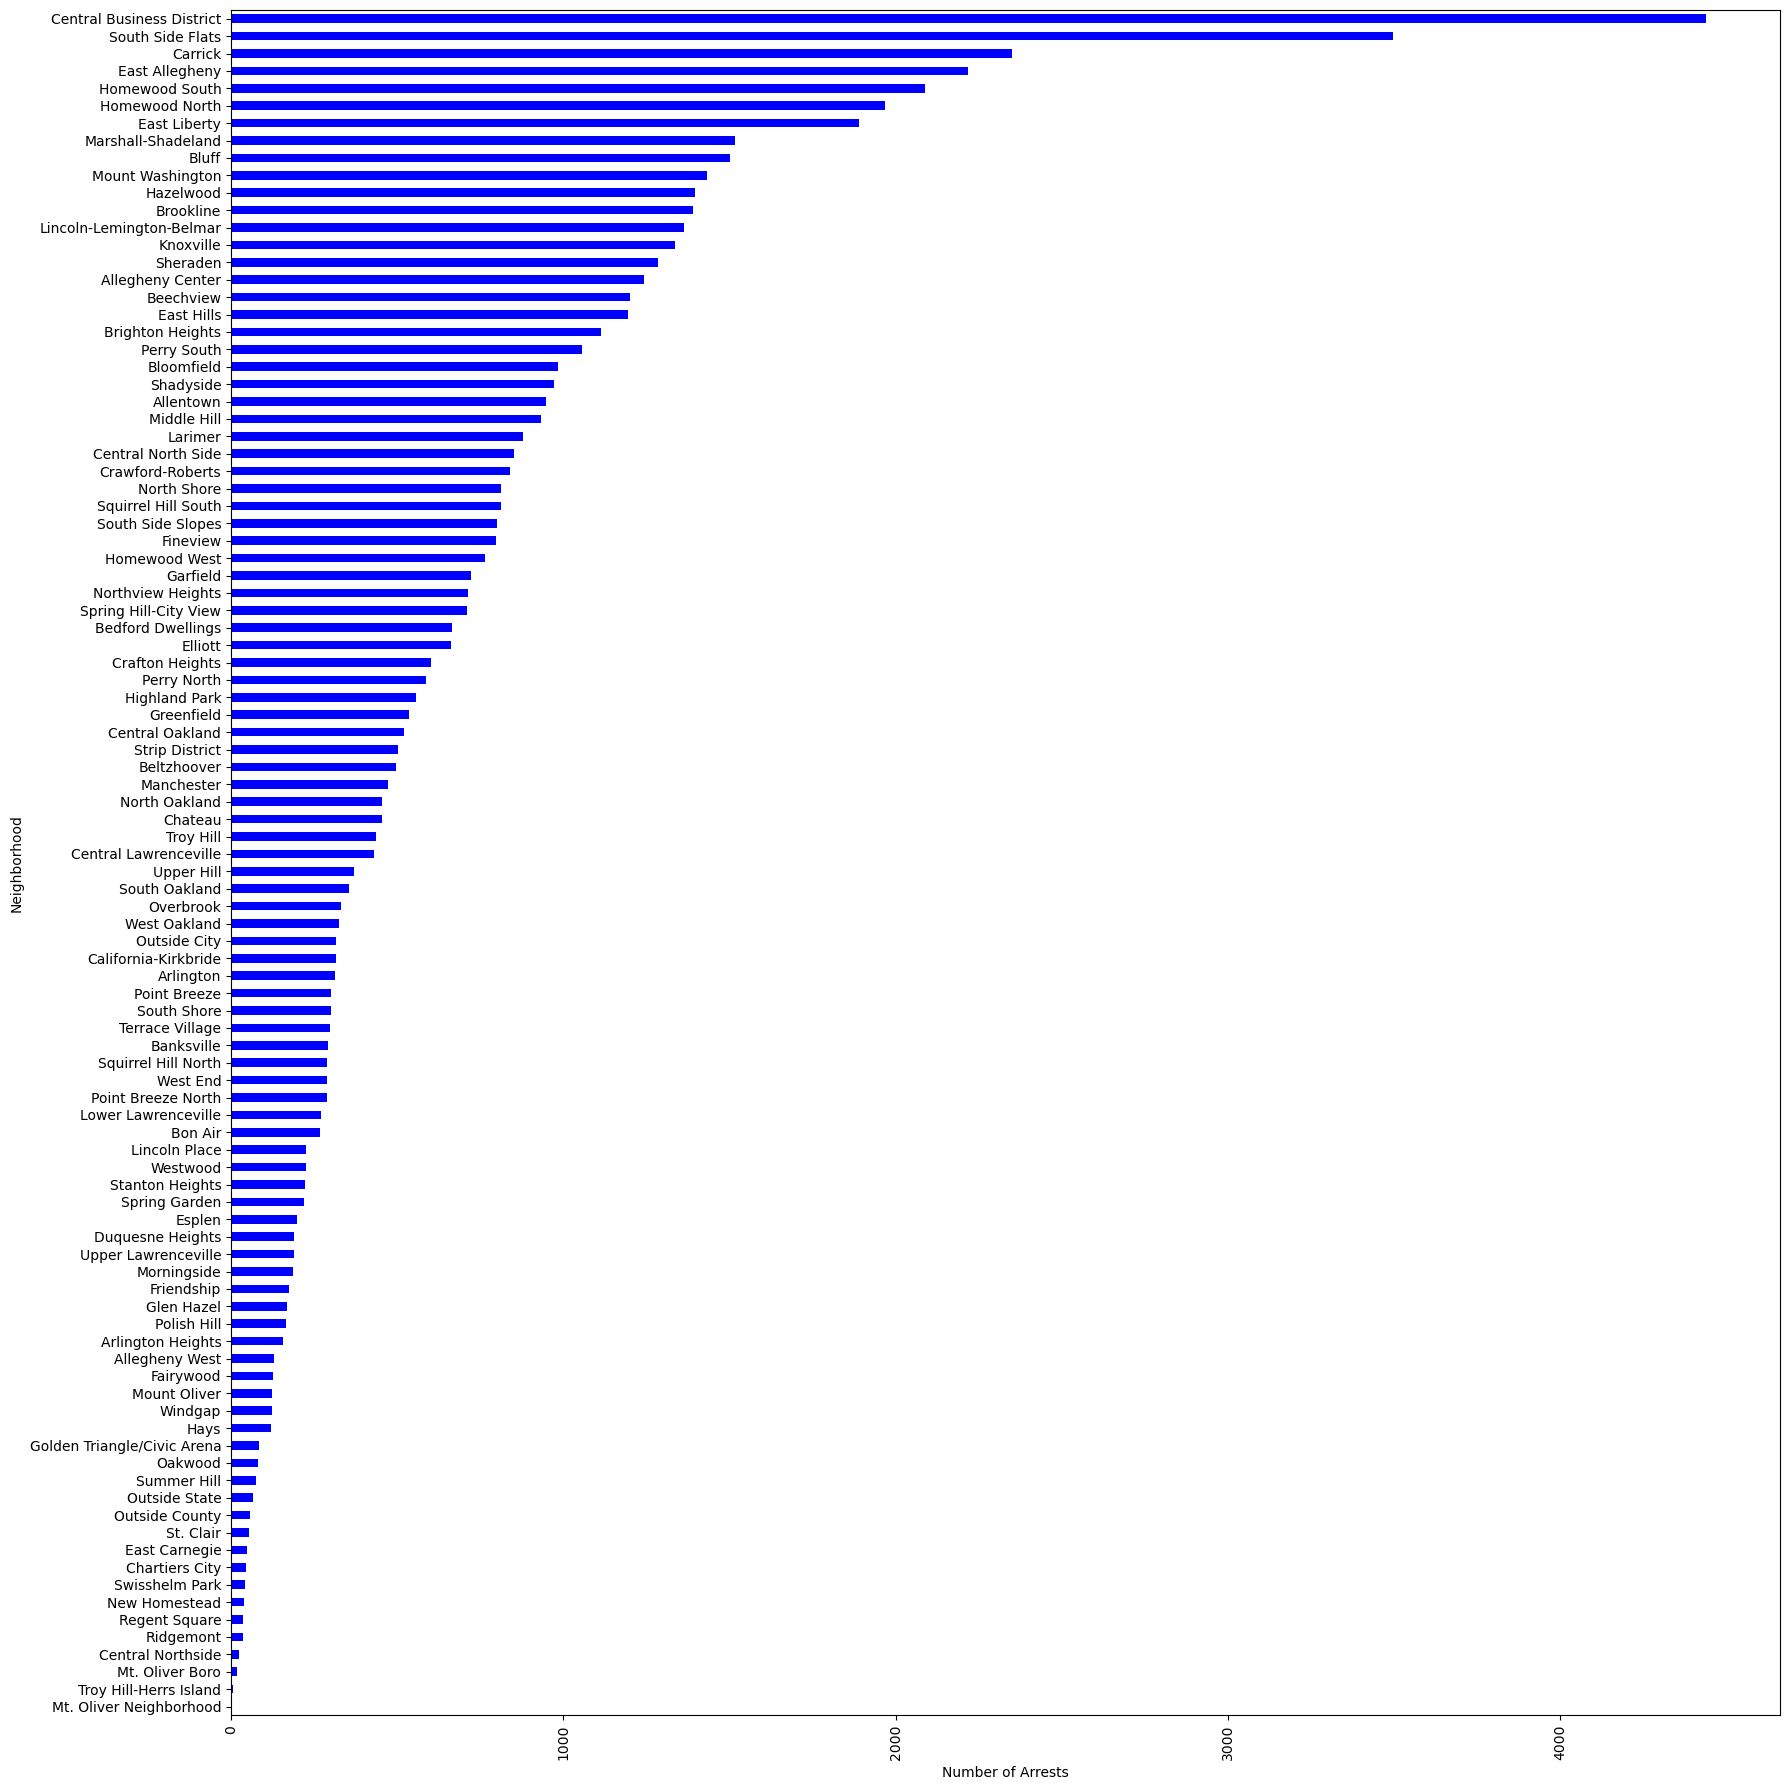

In [103]:
#find what neighborhood has the greatest total number of arrests
arrests['OFFENSES'] = pd.to_numeric(arrests['OFFENSES'], errors='coerce')
neighborhoodCounts = arrests['INCIDENTNEIGHBORHOOD'].value_counts()
neighborhoodCounts = neighborhoodCounts.sort_values(ascending=True)
plt.figure(figsize=(18,18))
neighborhoodCounts.plot(kind='barh', color='blue')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Clearly downtown has the greatest total number of crimes. There are many neighborhoods that have low crime counts. We can narrow this down to violent crimes; nobody wants to live surrounded in violence.

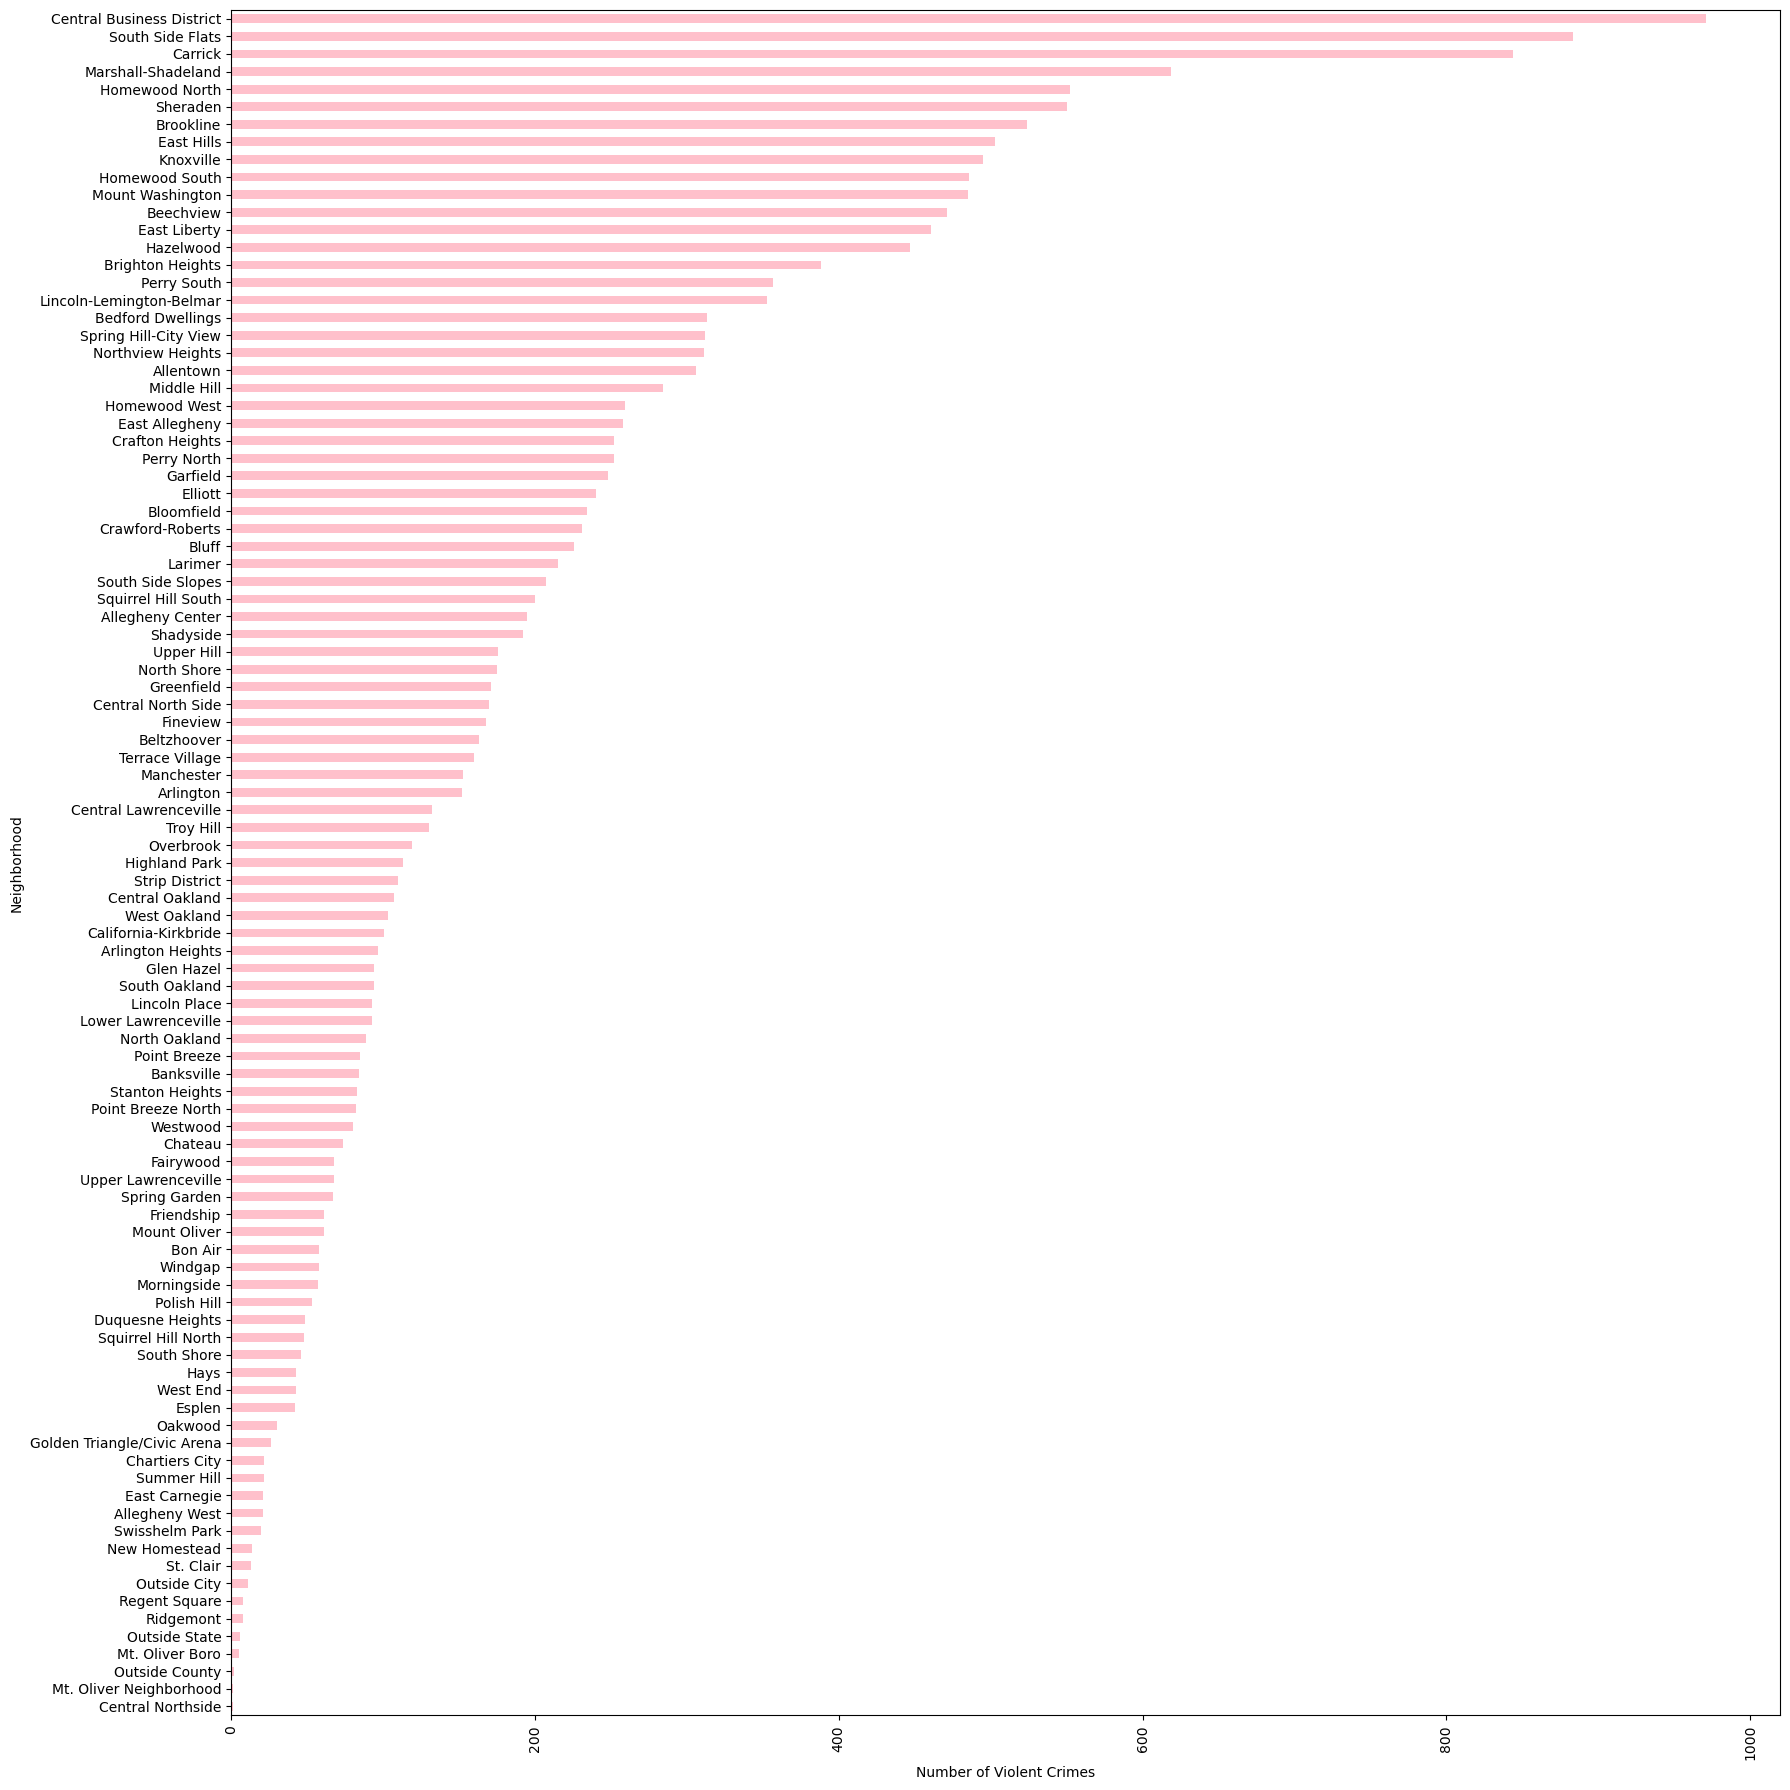

In [105]:
arrests = pd.read_csv("arrests.csv")
# List of violent crime keywords
violentKeywords = ['assault', 'battery', 'murder', 'aggravated', 'manslaughter', 'rape', 'robbery']

# Ensure OFFENSES are strings
# check if any keyword is present in each offense
arrests['Violence'] = arrests['OFFENSES'].apply(
    lambda x: any(keyword.lower() in str(x).lower() for keyword in violentKeywords) if isinstance(x, str) else False
)

# group by neighborhood and count violent crimes
violent_crimes_by_neighborhood = (
    arrests[arrests['Violence']]  # Filter only violent crimes
    .groupby('INCIDENTNEIGHBORHOOD')  # Group by neighborhood
    .size()  # Count the number of violent crimes per neighborhood
)

violent_crimes_by_neighborhood = violent_crimes_by_neighborhood.sort_values(ascending=True)

# Display the sorted neighborhoods
plt.figure(figsize=(18,18))
violent_crimes_by_neighborhood.plot(kind='barh', color='pink')
plt.xlabel('Number of Violent Crimes')
plt.ylabel('Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The same observation can be made as before.

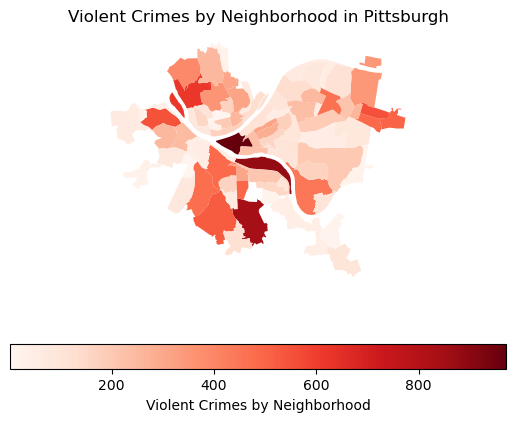

In [107]:
# map out all neighborhoods
neighborhoods = gpd.read_file("Neighborhoods_.shp")

# Rename the column in violent_crimes_by_neighborhood to match 'hood' in neighborhoods
violent_crimes_by_neighborhood = violent_crimes_by_neighborhood.reset_index()
violent_crimes_by_neighborhood.columns = ['Neighborhood', 'ViolentCrimeCount']

# Merge the GeoDataFrame with the violent crimes DataFrame
arrests_map = neighborhoods.merge(violent_crimes_by_neighborhood, how='left', left_on='hood', right_on='Neighborhood')

# Plot the results
arrests_map.plot(column='ViolentCrimeCount', cmap='Reds', legend=True, 
                 legend_kwds={'label': "Violent Crimes by Neighborhood", 
                              'orientation': "horizontal"})
plt.title("Violent Crimes by Neighborhood in Pittsburgh")
plt.axis('off')
plt.show()

We can see that the most populous neighborhoods have the highest quantity of crimes, which makes sense. But these places are the worst to live because the wellbeings of the population is lower due to the large quantity of crimes. The data shows that the smaller quieter places are the best neighborhoods to live in, which I agree with. 